## Plot the monthly number of searches for flights arriving at Málaga, Madrid or Barcelona

For the arriving airport, you can use the Destination column in the searches file. 

Plot a curve for Málaga, another one for Madrid, and another one for Barcelona, in the same figure.


Suggestion: follow the below plan of action:

* Get familiar with the data
* Select columns of interest
* Decide what to do with NaNs

* Make processing plan
* Develop code that works with a sample

* Adjust the code to work with Big data
* Test big data approach on a sample

* Run program with big data


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
sample = pd.read_csv('searches.csv.bz2', compression='bz2', header=0, nrows=5, sep='^')

In [4]:
sample['Destination']

0    AUH
1    MIL
2    SFO
3    ARN
4    MAD
Name: Destination, dtype: object

In [5]:
sample.columns

Index(['Date', 'Time', 'TxnCode', 'OfficeID', 'Country', 'Origin',
       'Destination', 'RoundTrip', 'NbSegments', 'Seg1Departure',
       'Seg1Arrival', 'Seg1Date', 'Seg1Carrier', 'Seg1BookingCode',
       'Seg2Departure', 'Seg2Arrival', 'Seg2Date', 'Seg2Carrier',
       'Seg2BookingCode', 'Seg3Departure', 'Seg3Arrival', 'Seg3Date',
       'Seg3Carrier', 'Seg3BookingCode', 'Seg4Departure', 'Seg4Arrival',
       'Seg4Date', 'Seg4Carrier', 'Seg4BookingCode', 'Seg5Departure',
       'Seg5Arrival', 'Seg5Date', 'Seg5Carrier', 'Seg5BookingCode',
       'Seg6Departure', 'Seg6Arrival', 'Seg6Date', 'Seg6Carrier',
       'Seg6BookingCode', 'From', 'IsPublishedForNeg', 'IsFromInternet',
       'IsFromVista', 'TerminalID', 'InternetOffice'],
      dtype='object')

In [6]:
def columns_csv(file, compression, sep):
    """
    To know which number fits with wich col name
    
    :param str file: Input file.
    :param str compression: Type of compression.
    :param str sep: Type o separator
    
    return: a dataframe with name of column and number
    """
    return pd.Series(pd.read_csv(file, compression=compression, header=None, nrows=1, sep=sep).T[0]).str.strip()

In [7]:
columns = columns_csv('searches.csv.bz2', compression='bz2', sep='^')

In [8]:
def cols_to_use(l_use, columns_csv):
    """
    List to columns to keep
    
    :param list l_use: List of str with the names of columns want to keep
    :param pd.Series columns_csv: Serie with the columns of the csv
    
    return: List with the number of column for selected column name
    """
    l = []
    for c in l_use:
        l.append(columns_csv[columns_csv == c].index[0])
    return l

In [9]:
list_cols_to_use = cols_to_use(l_use=['Date', 'Time', 'Destination'], columns_csv=columns)

In [10]:
df = pd.read_csv('searches.csv.bz2', compression='bz2', header=0, usecols=list_cols_to_use, sep='^', dtype={'Destination': 'category'})

In [11]:
df.describe(include='all')

,Date,Time,Destination
count,20390198,20390165,20390165
unique,360,84267,3068
top,2013-01-01,18:20:23,BKK
freq,57297,909,477093


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20390198 entries, 0 to 20390197
Data columns (total 3 columns):
Date           object
Time           object
Destination    category
dtypes: category(1), object(2)
memory usage: 350.1+ MB


In [13]:
df.isnull().sum()

Date            0
Time           33
Destination    33
dtype: int64

In [14]:
df.dtypes

Date             object
Time             object
Destination    category
dtype: object

## Select the columns of interest

In [15]:
df_nonan = df.dropna()
df_nonan.isnull().sum()

Date           0
Time           0
Destination    0
dtype: int64

## Make processing plan


* Filter Mad, Bcn, Agp
* Create YYYY-MM column
* Group by [destination, YYYY-MM]
* Sum
* Plot the results



### filter out the the searches for MAD, BCN, AGP

Take only the rows having MAD, BCN or AGP as destination

In [16]:
df_filtered = df_nonan[df_nonan['Destination'].isin(['MAD', 'BCN', 'AGP'])]

We need to get the month from the Date column

We cannot use a datetime function on 'date' column as it is string

Options:

* Using string and obtaining yyyy-mm directly from it

* Transforming string to date:      

  * parse_dates=['Date'] - in read_csv function

  * pd.to_datetime  - function

### Option 1) use directly pd.to_datetime()

In [17]:
df_filt = df_filtered.copy()

In [18]:
df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])

/home/dsc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Option 2) get PlotDate directly from the string

In [27]:
df_filt['PlotDate'] = df_filt['Date'].str[:7]
df_filt.head()
df_filt['Destination'] = df_filt['Destination'].astype(object)

In [28]:
nsearches = df_filt.groupby(['Destination', 'PlotDate']).count()
nsearches

Date   Time
Destination PlotDate              
AGP         2013-01    9633   9633
            2013-02    8379   8379
            2013-03   10659  10659
            2013-04    8265   8265
            2013-05   10830  10830
            2013-06    7923   7923
            2013-07    8892   8892
            2013-08    7866   7866
            2013-09    8151   8151
            2013-10    6499   6499
            2013-11    6384   6384
            2013-12    3696   3696
BCN         2013-01   29469  29469
            2013-02   28329  28329
            2013-03   30552  30552
            2013-04   31236  31236
            2013-05   28728  28728
            2013-06   26505  26505
            2013-07   29241  29241
            2013-08   27075  27075
            2013-09   23427  23427
            2013-10   20276  20276
            2013-11   19824  19824
            2013-12   15400  15400
MAD         2013-01   24258  24258
            2013-02   22800  22800
            2013-03   24681  24681
            2013-04   25251  25251
            2013-05   26334  26334
            2013-06   22800  22800
            2013-07   22971  22971
            2013-08   21831  21831
            2013-09   21147  21147
            2013-10   22294  22294
            2013-11   20272  20272
            2013-12   14504  14504

In [29]:
reset = nsearches.reset_index()
reset

,Destination,PlotDate,Date,Time
0,AGP,2013-01,9633,9633
1,AGP,2013-02,8379,8379
2,AGP,2013-03,10659,10659
3,AGP,2013-04,8265,8265
4,AGP,2013-05,10830,10830
5,AGP,2013-06,7923,7923
6,AGP,2013-07,8892,8892
7,AGP,2013-08,7866,7866
8,AGP,2013-09,8151,8151
9,AGP,2013-10,6499,6499


In [30]:
to_plot = reset.pivot(index='PlotDate', columns='Destination', values='Date')
to_plot

Destination,AGP,BCN,MAD
PlotDate,,,
2013-01,9633,29469,24258
2013-02,8379,28329,22800
2013-03,10659,30552,24681
2013-04,8265,31236,25251
2013-05,10830,28728,26334
2013-06,7923,26505,22800
2013-07,8892,29241,22971
2013-08,7866,27075,21831
2013-09,8151,23427,21147


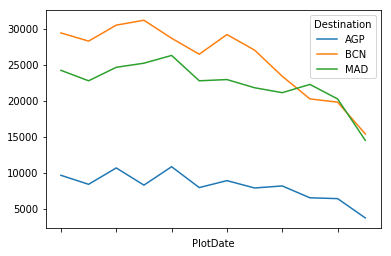

In [31]:
to_plot.plot()

## group by arr_port search month

In [32]:
df_filtered['Destination'] = df_filtered['Destination'].astype(object)

/home/dsc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [33]:
gb = df_filtered.groupby(by=['Destination', df_filtered['Date'].dt.month])['Time'].agg('count')

We need to reset the index because pivot requires a flat DataFrame

In [34]:
gbr = gb.reset_index()

Now we are ready to reorganize the DataFrame into the shape we need for plotting.

In [35]:
pt_gbr = gbr.pivot_table(index='Date', columns='Destination', values='Time', aggfunc='first')

## 4.3 Plotting

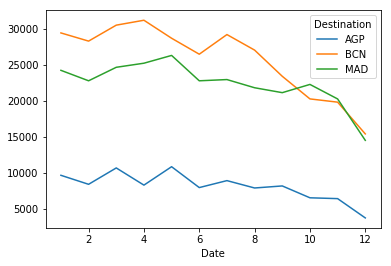

In [36]:
pt_gbr.plot()

## 5) Adjust the code to work with Big data

In [37]:
bd = pd.read_csv('searches.csv.bz2', compression='bz2', header=0, usecols=list_cols_to_use, sep='^', chunksize=10e4)

In [38]:
for chunk in bd:
    chunk = chunk[chunk['Destination'].isin(['MAD', 'BCN', 'AGP'])]

In [41]:
from datetime import datetime

In [42]:
%%time
reader = pd.read_csv('searches.csv.bz2', compression='bz2', header=0, usecols=list_cols_to_use, sep='^', chunksize=10e4)
partials = []

for nchunk, chunk in enumerate(reader):
    print('Starting with chunk %.2d at %s' % (nchunk, datetime.now()))
    filtered_destinations = chunk[chunk['Destination'].isin(['MAD', 'BCN', 'AGP'])]
    filtered_destinations['PlotDate'] = filtered_destinations['Date'].str[:7]
    nsearches = filtered_destinations.groupby(['Destination', 'PlotDate']).count()
    to_plot = nsearches.reset_index().pivot(index='PlotDate', columns='Destination', values='Date')
    
    partials.append(to_plot)
    
final_result = pd.concat(partials).reset_index().groupby('PlotDate').sum()
final_result

Starting with chunk 00 at 2018-12-07 17:41:12.526749


/home/dsc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


Starting with chunk 01 at 2018-12-07 17:41:15.342295
Starting with chunk 02 at 2018-12-07 17:41:18.511405
Starting with chunk 03 at 2018-12-07 17:41:20.670435
Starting with chunk 04 at 2018-12-07 17:41:22.745158
Starting with chunk 05 at 2018-12-07 17:41:24.594743
Starting with chunk 06 at 2018-12-07 17:41:26.581010
Starting with chunk 07 at 2018-12-07 17:41:28.633282
Starting with chunk 08 at 2018-12-07 17:41:30.532702
Starting with chunk 09 at 2018-12-07 17:41:32.235396
Starting with chunk 10 at 2018-12-07 17:41:34.202884
Starting with chunk 11 at 2018-12-07 17:41:36.292447
Starting with chunk 12 at 2018-12-07 17:41:38.223667
Starting with chunk 13 at 2018-12-07 17:41:40.062129
Starting with chunk 14 at 2018-12-07 17:41:42.028419
Starting with chunk 15 at 2018-12-07 17:41:44.037128
Starting with chunk 16 at 2018-12-07 17:41:45.890761
Starting with chunk 17 at 2018-12-07 17:41:47.841080
Starting with chunk 18 at 2018-12-07 17:41:49.844232
Starting with chunk 19 at 2018-12-07 17:41:51.

Starting with chunk 155 at 2018-12-07 17:46:17.189491
Starting with chunk 156 at 2018-12-07 17:46:18.957278
Starting with chunk 157 at 2018-12-07 17:46:20.632424
Starting with chunk 158 at 2018-12-07 17:46:22.461686
Starting with chunk 159 at 2018-12-07 17:46:24.274697
Starting with chunk 160 at 2018-12-07 17:46:26.178750
Starting with chunk 161 at 2018-12-07 17:46:27.992738
Starting with chunk 162 at 2018-12-07 17:46:29.768301
Starting with chunk 163 at 2018-12-07 17:46:31.549583
Starting with chunk 164 at 2018-12-07 17:46:33.255601
Starting with chunk 165 at 2018-12-07 17:46:35.013586
Starting with chunk 166 at 2018-12-07 17:46:36.746345
Starting with chunk 167 at 2018-12-07 17:46:38.484792
Starting with chunk 168 at 2018-12-07 17:46:40.190241
Starting with chunk 169 at 2018-12-07 17:46:41.930418
Starting with chunk 170 at 2018-12-07 17:46:43.731933
Starting with chunk 171 at 2018-12-07 17:46:45.481974
Starting with chunk 172 at 2018-12-07 17:46:47.228156
Starting with chunk 173 at 2

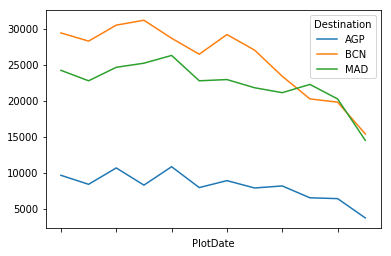

In [43]:
final_result.plot()

In [44]:
%%time
reader = pd.read_csv('searches.csv.bz2', compression='bz2', header=0, usecols=list_cols_to_use, sep='^', chunksize=10e4)
partials = []

for nchunk, chunk in enumerate(reader):
    print('Starting with chunk %.2d at %s' % (nchunk, datetime.now()))
    filtered_destinations = chunk[chunk['Destination'].isin(['MAD', 'BCN', 'AGP'])]
    filtered_destinations['count'] = 1
    nsearches = filtered_destinations.groupby(['Destination', 'Date']).count()
    to_plot = nsearches.reset_index().pivot(index='Date', columns='Destination', values='count')
    
    partials.append(to_plot)
    
per_day = pd.concat(partials).reset_index().groupby('Date').sum()
per_day

Starting with chunk 00 at 2018-12-07 17:47:45.814247


/home/dsc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


Starting with chunk 01 at 2018-12-07 17:47:47.726298
Starting with chunk 02 at 2018-12-07 17:47:49.494373
Starting with chunk 03 at 2018-12-07 17:47:51.310723
Starting with chunk 04 at 2018-12-07 17:47:53.116339
Starting with chunk 05 at 2018-12-07 17:47:54.830129
Starting with chunk 06 at 2018-12-07 17:47:56.729112
Starting with chunk 07 at 2018-12-07 17:47:58.740064
Starting with chunk 08 at 2018-12-07 17:48:00.506502
Starting with chunk 09 at 2018-12-07 17:48:02.511224
Starting with chunk 10 at 2018-12-07 17:48:04.208288
Starting with chunk 11 at 2018-12-07 17:48:06.000786
Starting with chunk 12 at 2018-12-07 17:48:07.728437
Starting with chunk 13 at 2018-12-07 17:48:09.493597
Starting with chunk 14 at 2018-12-07 17:48:11.487341
Starting with chunk 15 at 2018-12-07 17:48:13.248810
Starting with chunk 16 at 2018-12-07 17:48:14.958665
Starting with chunk 17 at 2018-12-07 17:48:16.624954
Starting with chunk 18 at 2018-12-07 17:48:18.416000
Starting with chunk 19 at 2018-12-07 17:48:20.

Starting with chunk 155 at 2018-12-07 17:52:31.393105
Starting with chunk 156 at 2018-12-07 17:52:33.104707
Starting with chunk 157 at 2018-12-07 17:52:34.768564
Starting with chunk 158 at 2018-12-07 17:52:36.567831
Starting with chunk 159 at 2018-12-07 17:52:38.294938
Starting with chunk 160 at 2018-12-07 17:52:39.960109
Starting with chunk 161 at 2018-12-07 17:52:41.872204
Starting with chunk 162 at 2018-12-07 17:52:43.695705
Starting with chunk 163 at 2018-12-07 17:52:45.787952
Starting with chunk 164 at 2018-12-07 17:52:48.246451
Starting with chunk 165 at 2018-12-07 17:52:50.660206
Starting with chunk 166 at 2018-12-07 17:52:52.733521
Starting with chunk 167 at 2018-12-07 17:52:54.547518
Starting with chunk 168 at 2018-12-07 17:52:56.321146
Starting with chunk 169 at 2018-12-07 17:52:58.092697
Starting with chunk 170 at 2018-12-07 17:52:59.891446
Starting with chunk 171 at 2018-12-07 17:53:01.633022
Starting with chunk 172 at 2018-12-07 17:53:03.451507
Starting with chunk 173 at 2

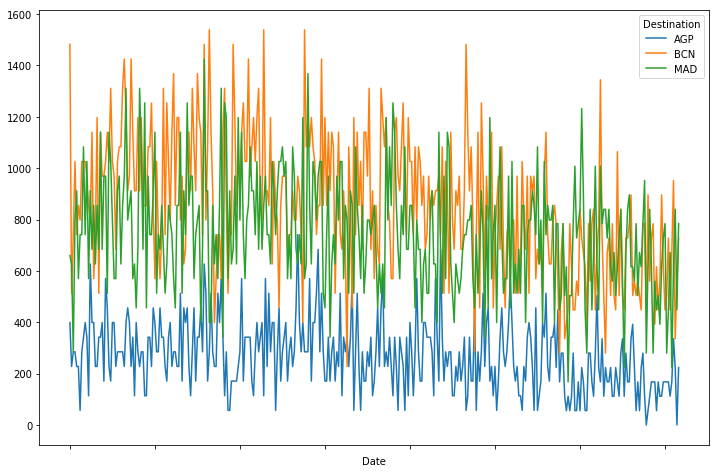

In [45]:
f, ax = plt.subplots(figsize=(12,8))
per_day.plot(ax=ax)